<a href="https://colab.research.google.com/github/NguyenViKhang20130287/MachineLearning/blob/main/GK_ML__NHOM27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Đồ án Máy học**

Nguyễn Vĩ Khang, Nguyễn Phi Khanh

Phân loại tiền thật, tiền giả.


# **1. Giới thiệu**

**1.1 Mô tả dữ liệu và các thuộc tính.**

Dataset "data_banknote_authentication" là một tập dữ liệu được sử dụng trong lĩnh vực phân loại, nó bao gồm các thông tin về các hình ảnh được chụp của các mẫu tiền giả và tiền thật. Dataset này được sử dụng phổ biến trong các nghiên cứu về học máy và các thuật toán phân loại để huấn luyện và đánh giá hiệu suất của các mô hình phân loại.

Dữ liệu được trích xuất từ ​​các hình ảnh được lấy từ các mẫu vật giống như tiền giấy thật và giả mạo. Để số hóa, một máy ảnh công nghiệp thường được sử dụng để kiểm tra bản in đã được sử dụng. Những hình ảnh cuối cùng có 400x 400 pixel. Do ống kính đối tượng và khoảng cách đến đối tượng được điều tra, các bức ảnh tỷ lệ xám với độ phân giải khoảng 660 dpi đã thu được. Công cụ Biến đổi Wavelet được sử dụng để trích xuất các tính năng từ hình ảnh.

Tập dữ liệu này bao gồm 1372 mẫu và mỗi mẫu có 5 thuộc tính. Các thuộc tính này bao gồm:

+ Phương sai của hình ảnh biến đổi Wavelet (variance).
+ Độ lệch của hình ảnh biến đổi Wavelet (skewness).
+ Độ cong của Wavelet Transformed image (curtosis).
+ Entropy của hình ảnh (entropy).
+ Class

Mô tả chi tiết các thuộc tính:
+ *Variance*: trong tập dữ liệu này, thuộc tính "variance" được tính toán dựa trên phép biến đổi Wavelet của hình ảnh được chụp từ một mẫu tiền giấy. Giá trị này có thể được tính toán bằng cách tính toán phương sai của các giá trị trong các thành phần tần số của phép biến đổi Wavelet. 
+ *Skewness*: trong tập dữ liệu này, thuộc tính "skewness" được tính toán dựa trên phép biến đổi Wavelet của hình ảnh được chụp từ một mẫu tiền giấy. Giá trị này có thể được tính toán bằng cách tính toán độ lệch chuẩn của các giá trị trong các thành phần tần số của phép biến đổi Wavelet..
+ *Curtosis*: trong tập dữ liệu này, thuộc tính "curtosis" được tính toán dựa trên phép biến đổi Wavelet của hình ảnh được chụp từ một mẫu tiền giấy. Giá trị này có thể được tính toán bằng cách tính toán độ xiên của các giá trị trong các thành phần tần số của phép biến đổi Wavelet.
+ *Entropy*: trong tập dữ liệu này, thuộc tính "entropy" thường được tính toán dựa trên hình ảnh được chụp của một mẫu tiền giấy. Giá trị entropy của hình ảnh này có thể được tính toán bằng cách sử dụng các thuật toán xử lý ảnh và tính toán thông tin của các pixel trên hình ảnh.
+ *Class*: Thuộc tính "Class" trong dataset "data_banknote_authentication" là thuộc tính nhãn lớp (label) được sử dụng để xác định mẫu tiền giấy có phải là tiền thật hay tiền giả. Cụ thể, thuộc tính "Class" có giá trị bằng 0 hoặc 1, trong đó 0 tương ứng với tiền giả và 1 tương ứng với tiền thật.

Mỗi mẫu trong tập dữ liệu được đánh dấu là tiền giả hoặc tiền thật, đây là nhãn lớp (label) được sử dụng để đánh giá hiệu suất của các thuật toán phân loại.

Tập dữ liệu này đã được sử dụng trong nhiều nghiên cứu và là một trong những tập dữ liệu phổ biến để thử nghiệm và so sánh hiệu suất của các thuật toán phân loại khác nhau.

**1.2 Biểu đồ phân bố các dữ liệu**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('data_banknote_authentication.csv')


Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


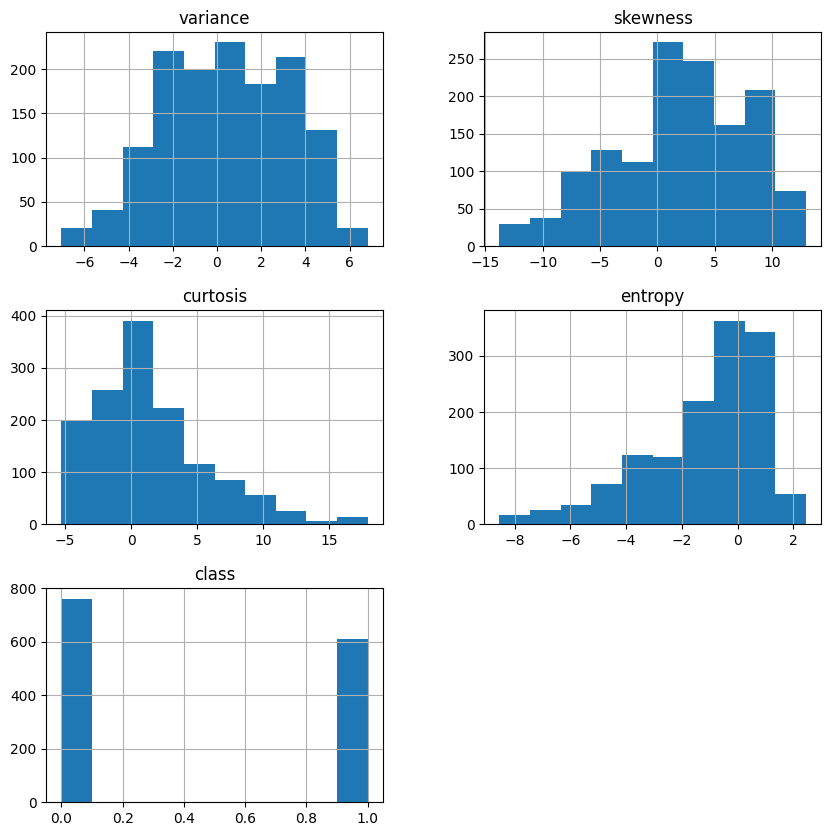

In [ ]:
# Vẽ biểu đồ histogram của các thuộc tính trong dataset
df.hist(figsize=(10, 10))
plt.show()

**1.3 Các vấn đề của dữ liệu.**

Số lượng mẫu dữ liệu không lớn: Dataset chỉ bao gồm 1.372 mẫu dữ liệu, điều này có thể dẫn đến sự thiếu hụt đại diện của dữ liệu và làm giảm độ chính xác của các mô hình học máy.

Mất cân bằng dữ liệu: Phân bố nhãn (label) của dataset không cân bằng. Cụ thể, số lượng mẫu dữ liệu về tiền giấy giả (class 1) chiếm khoảng 44% trong khi số lượng mẫu dữ liệu về tiền giấy thật (class 0) chiếm khoảng 56%. Điều này có thể dẫn đến sự thiếu chính xác của mô hình trong việc dự đoán các mẫu dữ liệu thuộc class thiểu số.

Thuộc tính không tương quan: Các thuộc tính trong dataset không có tương quan đáng kể với nhau, điều này có thể dẫn đến hiện tượng đa cộng tuyến (multicollinearity) trong các mô hình học máy.

Các thuộc tính không chuẩn hóa: Các thuộc tính trong dataset có các phạm vi giá trị khác nhau, điều này có thể dẫn đến sự thiếu ổn định của các mô hình học máy.

Thiếu dữ liệu: Dataset không có giá trị null hoặc missing values, tuy nhiên, trong một số trường hợp, giá trị của các thuộc tính có thể bị sai sót hoặc không chính xác, điều này có thể ảnh hưởng đến độ chính xác của các mô hình học máy.

# **2. Chuẩn bị dữ liệu**

**2.1 Thu thập dữ liệu**

Dataset "data_banknote_authentication" là một tập dữ liệu chứa thông tin về các mẫu tiền giấy, được sử dụng để phân loại các mẫu tiền giấy là giả hay thật dựa trên các đặc trưng của chúng.

Cơ sở thu thập dữ liệu của tập dữ liệu này được mô tả như sau:

Tập dữ liệu được thu thập bằng cách quét và phân tích các mẫu tiền giấy thực tế.
Các mẫu tiền giấy được thu thập từ hai nguồn khác nhau: một nguồn từ cây ATM và một nguồn từ một ngân hàng thương mại.
Mỗi mẫu tiền giấy được quét bằng máy quét với độ phân giải 400 dpi, sau đó được phân tích để trích xuất các đặc trưng.
Tập dữ liệu gồm có 1372 mẫu tiền giấy, trong đó 762 mẫu là tiền giấy giả và 610 mẫu là tiền giấy thật.
Các đặc trưng được trích xuất bao gồm các thông số của sóng dạng, biên độ và tần số của hình dạng sóng dạng được rút ra từ hình ảnh tiền giấy.
Các đặc trưng này đã được tiền xử lý và chuẩn hóa để có giá trị trong khoảng [-1, 1].
Tập dữ liệu này đã được sử dụng trong nhiều nghiên cứu và thử nghiệm để đánh giá độ chính xác của các thuật toán học máy và mô hình phân loại.

**2.2 Thăm dò dữ liệu**

In [25]:
import pandas as pd

# Hiển thị số lượng mẫu và đặc trưng
print(f"Số lượng mẫu: {df.shape[0]}")
print(f"Số lượng đặc trưng: {df.shape[1]-1}")  # Trừ đi cột lớp

# Hiển thị số lượng và phân bố lớp
class_counts = df['class'].value_counts()
print("Số lượng mẫu theo lớp:")
print(class_counts)
print("Phân bố lớp:")
print(class_counts / df.shape[0])

# Hiển thị thông tin về dữ liệu
print("\nThông tin về dữ liệu:")
print(df.info())


Số lượng mẫu: 1372
Số lượng đặc trưng: 4
Số lượng mẫu theo lớp:
0    762
1    610
Name: class, dtype: int64
Phân bố lớp:
0    0.555394
1    0.444606
Name: class, dtype: float64

Thông tin về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


Tập dữ liệu có tổng cộng 1372 mẫu, được chia thành 2 lớp: lớp 0 đại diện cho các tờ tiền thật và lớp 1 đại diện cho các tờ tiền giả. Số lượng mẫu của mỗi lớp lần lượt là 762 và 610. Phân bố của các lớp là khá cân bằng, với lớp 0 chiếm khoảng 55,4% và lớp 1 chiếm khoảng 44,6% của tập dữ liệu.

<Axes: xlabel='class', ylabel='entropy'>

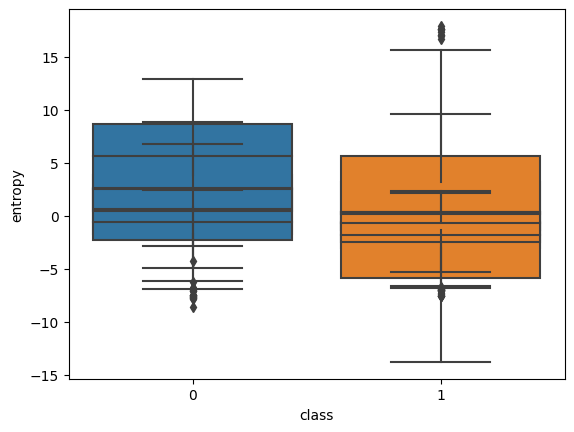

In [10]:
import seaborn as sns


# Tách dữ liệu thành hai tập tương ứng với từng lớp
class0_data = df.groupby('class').get_group(0)
class1_data = df.groupby('class').get_group(1)

# Vẽ biểu đồ hộp cho từng đặc trưng
sns.boxplot(x='class', y='variance', data=df)
sns.boxplot(x='class', y='skewness', data=df)
sns.boxplot(x='class', y='curtosis', data=df)
sns.boxplot(x='class', y='entropy', data=df)


**2.3 Tiền xử lí dữ liệu**

In [24]:
# Kiểm tra số giá trị missing trong dữ liệu
print(df.isnull().sum())

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


Tập dữ liệu không có giá trị missing trong dataset data_banknote_authentication. Do đó, ta không cần phải thực hiện tiền xử lí dữ liệu missing.

In [4]:
# Xóa các cột chứa một giá trị
df = df.loc[:, df.nunique() > 1]

In [ ]:
# Chuyển đổi các biến định tính thành biến định lượng bằng binary encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

# Sử dụng các biến định lượng trực tiếp
X = df.drop('class', axis=1)
y = df['class']

# Khởi tạo scaler
scaler = StandardScaler()

# Chuẩn hoá dữ liệu
X_scaled = scaler.fit_transform(X)

# In 5 dòng đầu tiên của ma trận sau khi chuẩn hoá
print(X_scaled[:5])


[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 [ 1.06374236  1.29547754 -1.25539712 -1.14402883]
 [-0.03677175 -1.0870383   0.73673042  0.09658697]]


**2.4 Trích chọn đặc trưng.**

In [7]:
import numpy as np

# Lấy ra danh sách tên các đặc trưng định tính
numerical = df.drop(columns=['class']).select_dtypes(include=np.number).columns.tolist()

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Tạo các transformer cho các cột dữ liệu số và phân loại
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Kết hợp các transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical)
    ])

# Tạo pipeline để kết hợp các bước chuyển đổi và trích chọn đặc trưng
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(mutual_info_classif, k=4))
])

# Áp dụng pipeline cho tập dữ liệu
X = df.drop(['class'], axis=1)
y = df['class']

X_selected = pipe.fit_transform(X, y)
print(X_selected)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]


<ipython-input-9-c92c26818eec>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_num = df[num_columns].values.astype(np.float)


>Threshold=0.00, Features=4
>Threshold=0.05, Features=4
>Threshold=0.10, Features=4
>Threshold=0.15, Features=4
>Threshold=0.20, Features=4
>Threshold=0.25, Features=4
>Threshold=0.30, Features=4
>Threshold=0.35, Features=4
>Threshold=0.40, Features=4
>Threshold=0.45, Features=4
>Threshold=0.50, Features=4


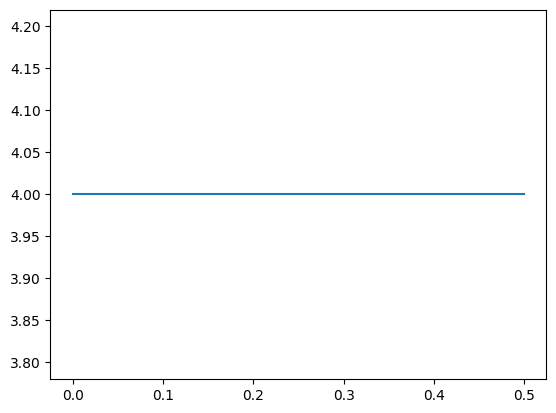

In [9]:
# Chuyển đổi các biến định lượng
num_columns = ['variance', 'skewness', 'curtosis','entropy']
X_num = df[num_columns].values.astype(np.float)


from sklearn.feature_selection import VarianceThreshold

thresholds = np.arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()

for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
    
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

# **3. Xây dựng và đánh giá mô hình.**

Các thuật toán dùng để xây dựng mô hình:

- Neural network
- SVM
- kNN
- Naïve Bayes
- RandomForest
- Decision Tree

Ta sẽ xây dựng một hàm tổng quát nhận vào thuật toán phân lớp để sử dụng cho các thuật toán khác nhau. Các bước của hàm sẽ như sau:

Bước 1: Lấy dữ liệu từ X_selected và y đã qua xử lý ở trên. 

Bước 2: Phân chia tập dữ liệu thành các tập test và train với 25% cho test và train là 75%, bảo tồn tỷ lệ phân lớp (stratify=y) với hàm train_test_split. 

Bước 3: Khởi tạo mô hình, nhận thuật toán phân lớp thông qua tham số clf (classifier) của hàm. 

Bước 4: Đánh giá mô hình bằng Cross Validation trên tập train: Đánh giá 4 hệ số: Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1. Cross Validation có 5 fold, 3 lần lặp lại, bảo tồn tỷ lệ phân lớp (stratified). Triển khai thông qua lớp RepeatedStratifiedKFold của sklearn. (Có hiệu suất tốt cũng như được khuyến nghị sử dụng hơn KFold). Thực hiện kiểm chứng mô hình trên tập train, kết quả đánh giá được lưu vào tệp clf_cv_scores.csv để sử dụng so sánh giữa các mô hình. 

Bước 5: Huấn luyện mô hình, dùng model để dự đoán trên tập test. Bước 6: Đánh giá kết quả dự đoán của mô hình trên tập test: Đánh giá 4 hệ số: Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1. Lưu kết quả đánh giá vào tệp clf_model_scores.csv. Vẽ biểu đồ hộp cho 4 hệ số đánh giá từ kết quả cross validation trên tập train. Vẽ Confusion Matrix cho kết quả dự đoán của mô hình trên tập test.

In [10]:
from matplotlib import axis
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Phân chia dữ liệu, bảo tồn tỷ lệ phân lớp (stratify=y).
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

def build_and_eval_model(clf):
  
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation with train set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    clf.fit(X_train, y_train)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = clf.predict(X_test)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred, average='macro')],
                                 'recall': [recall_score(y_test, y_pred, average='macro')],
                                 'f1': [f1_score(y_test, y_pred, average='macro')]})
    print('B. Final Validation with test set')
    print(final_scores.to_string(index=False))

    #  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=axs[1])
    plt.show()

    # Lưu kết quả đánh giá
    cv_scores.to_csv('{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('{}_final_scores.csv'.format(clf.__class__.__name__), index=False)

**3.1 SVM**

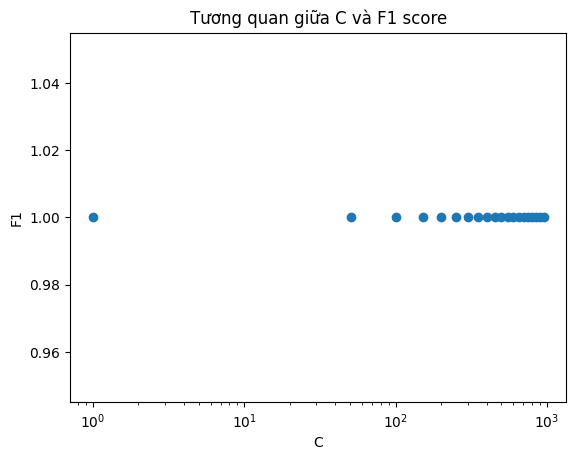

Giá trị C tốt nhất: 1


In [8]:

#Lựa chọn tham số C bằng cách kiểm tra tương quan giữa C và F1
from sklearn import svm

# Ta sẽ kiểm tra trong khoảng từ 1 đến 1000 với bước nhảy mỗi lần là 50
C_range = np.arange(start=1, stop=1000, step=50)

# Lưu giá trị C và F1 score tương ứng
C_list = []
f1_list = []

for C in C_range:
    # Huấn luyện mô hình SVM
    clf = svm.SVC(C=C)
    clf.fit(X_train, y_train)
    # Tính toán F1 score trên tập kiểm tra
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    # Lưu giá trị C và F1 score
    C_list.append(C)
    f1_list.append(f1)

# Vẽ biểu đồ tương quan giữa C và F1 score
plt.plot(C_list, f1_list, 'o', linestyle='')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1')
plt.title('Tương quan giữa C và F1 score')
plt.show()

# Chọn giá trị C tốt nhất
best_C = C_list[np.argmax(f1_list)]
print('Giá trị C tốt nhất:', best_C)

A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count           15.0                  15.0               15.0           15.0
mean             1.0                   1.0                1.0            1.0
std              0.0                   0.0                0.0            0.0
min              1.0                   1.0                1.0            1.0
25%              1.0                   1.0                1.0            1.0
50%              1.0                   1.0                1.0            1.0
75%              1.0                   1.0                1.0            1.0
max              1.0                   1.0                1.0            1.0
B. Final Validation with test set
 accuracy  precision  recall  f1
      1.0        1.0     1.0 1.0


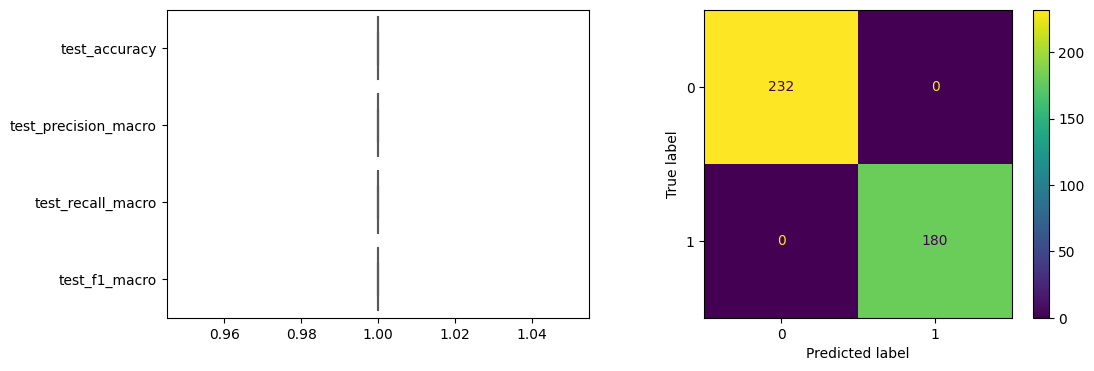

In [11]:
clf = svm.SVC(C=1)
build_and_eval_model(clf)

3.2 k-NN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best k: ", grid.best_params_['n_neighbors'])
print("Best accuracy: ", grid.best_score_)

Best k:  3
Best accuracy:  0.9989583333333332


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.998611              0.998476           0.998742       0.998598
std         0.003092              0.003384           0.002800       0.003120
min         0.989583              0.988636           0.990566       0.989491
25%         1.000000              1.000000           1.000000       1.000000
50%         1.000000              1.000000           1.000000       1.000000
75%         1.000000              1.000000           1.000000       1.000000
max         1.000000              1.000000           1.000000       1.000000
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.997573   0.997238 0.997845 0.997535


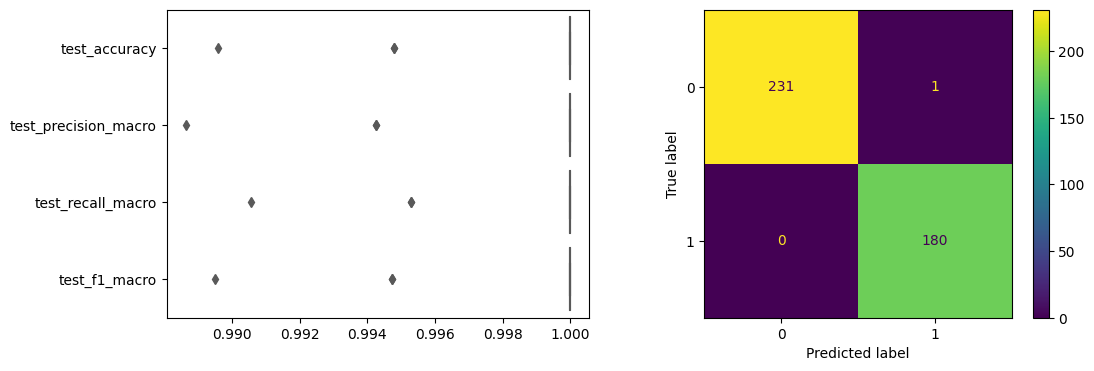

In [13]:
clf = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
build_and_eval_model(clf)

3.3 Naive Bayes

A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.841319              0.842822           0.836763       0.838464
std         0.033342              0.035341           0.033452       0.033744
min         0.755208              0.753253           0.749781       0.750987
25%         0.835938              0.838547           0.829476       0.832223
50%         0.843750              0.842593           0.842036       0.842915
75%         0.848958              0.853493           0.844394       0.845911
max         0.906250              0.907317           0.903028       0.904762
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.832524   0.830184 0.828879 0.829486


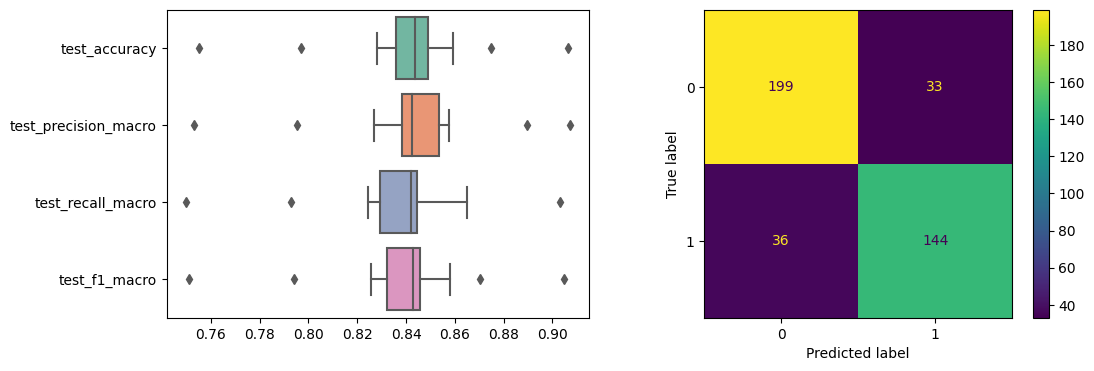

In [14]:
from sklearn.naive_bayes import GaussianNB

def build_and_eval_model_nb(clf):

    X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_selected, y, test_size=0.3, random_state=0)
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(clf, X_train_nb, y_train_nb, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation with train set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    clf.fit(X_train_nb, y_train_nb)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = clf.predict(X_test_nb)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test_nb, y_pred)],
                                 'precision': [precision_score(y_test_nb, y_pred, average='macro')],
                                 'recall': [recall_score(y_test_nb, y_pred, average='macro')],
                                 'f1': [f1_score(y_test_nb, y_pred, average='macro')]})
    print('B. Final Validation with test set')
    print(final_scores.to_string(index=False))

    #  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test_nb, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=axs[1])
    plt.show()

    # Lưu kết quả đánh giá
    cv_scores.to_csv('{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('{}_final_scores.csv'.format(clf.__class__.__name__), index=False)

clf = GaussianNB()
build_and_eval_model_nb(clf)

3.4 Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rf = RandomForestClassifier()

clf = GridSearchCV(estimator= rf, param_grid=param_grid)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

rf_accuracy_score = accuracy_score(y_test, clf_predict)
rf_precision_score = precision_score(y_test, clf_predict, average='macro')
rf_recall_score = recall_score(y_test, clf_predict, average='macro')
rf_f1_score = f1_score(y_test, clf_predict, average='macro')
rf_best_param = clf.best_params_
rf_bestscore = clf.best_score_
print(rf_best_param)
print(rf_bestscore)

{'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 150}
0.971875


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.969792              0.969725           0.970301       0.969533
std         0.018064              0.018470           0.017008       0.018132
min         0.927083              0.926183           0.930671       0.926797
25%         0.958333              0.958989           0.959357       0.957921
50%         0.973958              0.974217           0.972027       0.973579
75%         0.984375              0.984991           0.983655       0.984184
max         0.994792              0.994253           0.995283       0.994740
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.966019   0.965469 0.965469 0.965469


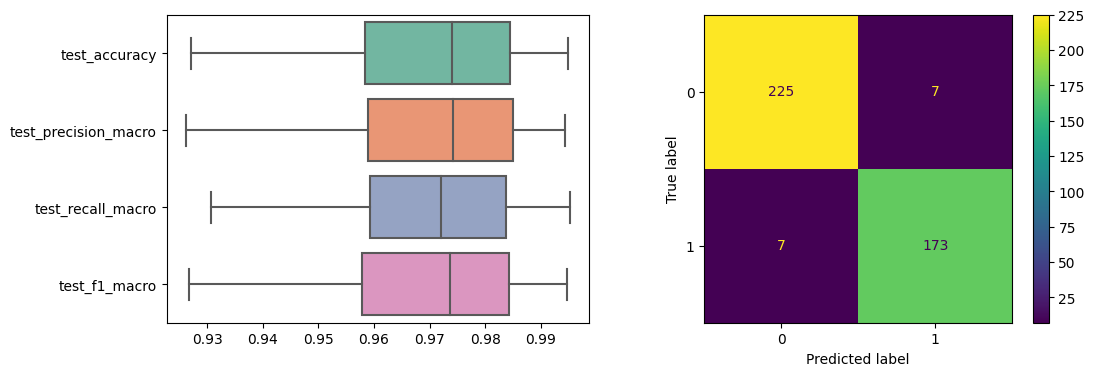

In [16]:
clf = RandomForestClassifier(max_depth= 9, max_features='sqrt', max_leaf_nodes=9, n_estimators=25)
build_and_eval_model(clf)

3.5 Neural Networks

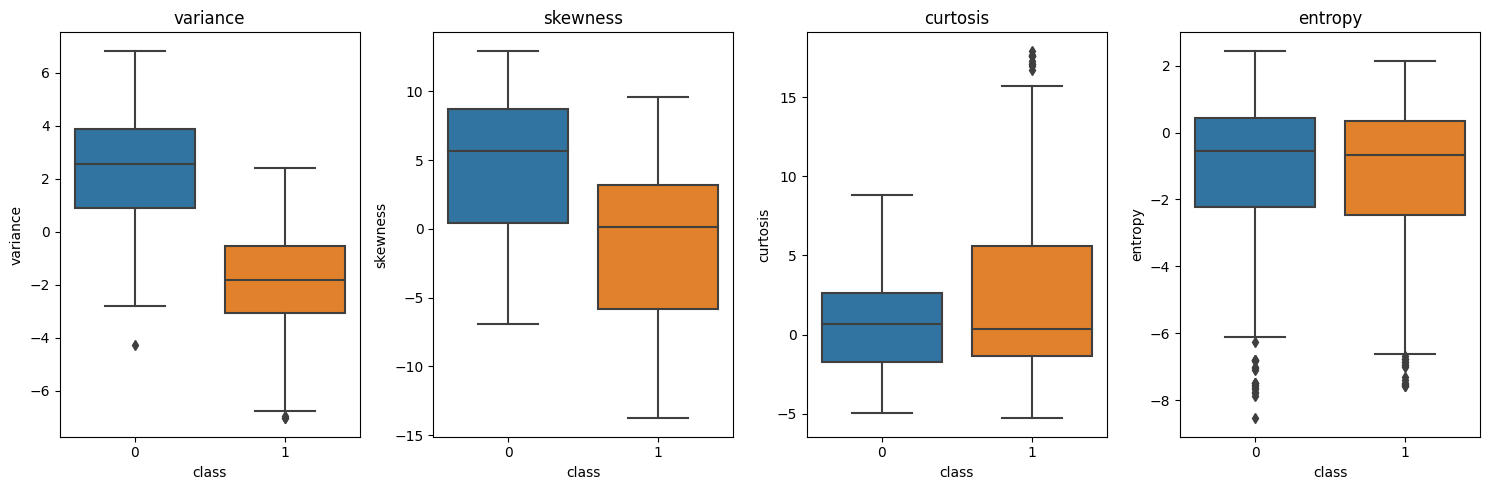

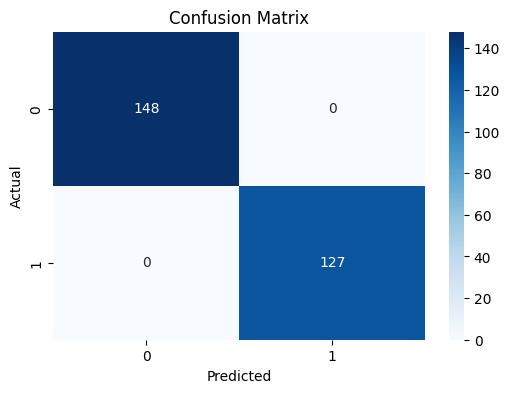

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV hoặc từ nguồn dữ liệu khác
data = pd.read_csv("data_banknote_authentication.csv")

# Tách features (X) và target (y)
X = data.drop("class", axis=1)
y = data["class"]

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Neural Network
model = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)
model.fit(X_train, y_train)

# Dự đoán nhãn của tập kiểm tra
y_pred = model.predict(X_test)

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị biểu đồ hộp cho từng đặc trưng
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, column in enumerate(X.columns):
    sns.boxplot(x=y, y=column, data=data, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

# Hiển thị biểu đồ confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
